In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use("bmh")

# Q1. What is the difference between convolution vs. correlation?

Correlation 
= [1, 2, 3]
  [4, 5, 6]
  [7, 8, 9]
  

Convolution
= [9, 8, 7]
  [6, 5, 4]
  [3, 2, 1]
  
And then you do the element wise multiplication. Afterwards, sum every element in the resulting matrix and that is the new element.

# Q2. Implement convolution that the convolutional neural network refers to

In [29]:
def convolution_2d(stencil, image):
    stencil_height = len(stencil)
    stencil_width = len(stencil)
    new_image = np.zeros((len(image), len(image[0])))
    for i in range(len(image)):
        for j in range(len(image[0])):
            new_image[i, j] = np.sum(stencil * image[i:i+stencil_height, j:j+stencil_width])
            
    return new_image

# Testing the convolution

In [30]:
def make_test_image(N=512):
    X = np.random.randint(0, 64, (N, N))

    for k in range(6):
        i0, j0 = np.random.randint(0, N-32, 2)
        i1 = np.random.randint(i0 + 8, N)
        j1 = np.random.randint(j0 + 8, N)
        X[i0 : i1, j0 : j1] = np.cumsum(
            np.random.randint(0, 6, (i1 - i0, j1 - j0)),
            axis=k%2
        )
    X = np.minimum(X, 255)
    return X

<IPython.core.display.Javascript object>


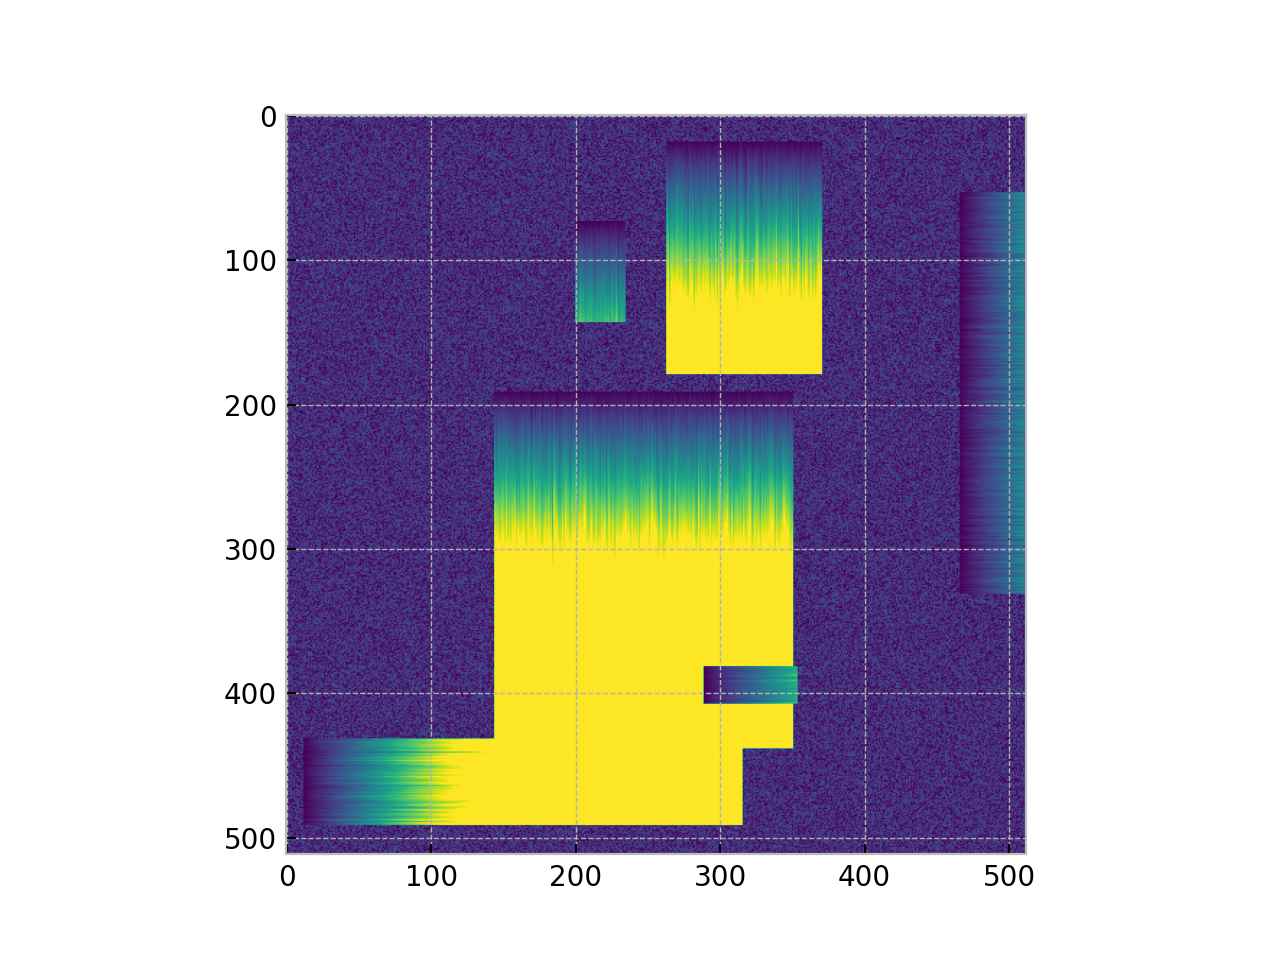

In [31]:
image = make_test_image()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image)

In [32]:
stencil = np.array([[-1, 0], [0, 1]])

In [33]:
len(image)

512

In [35]:
conv = convolution_2d(stencil, image)

<IPython.core.display.Javascript object>


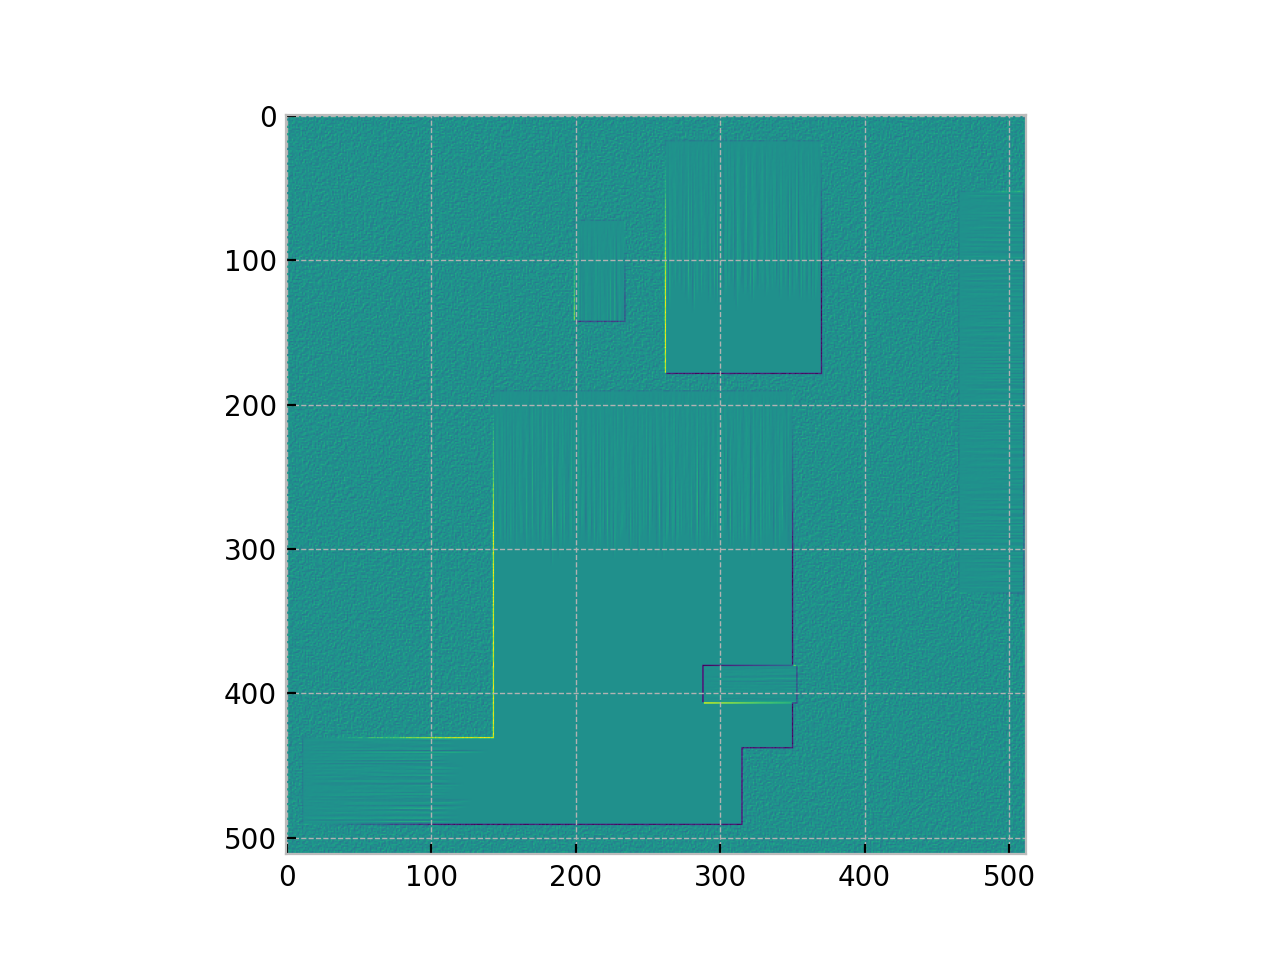

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(conv)